In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import numpy as np
import matplotlib.pyplot as plt

from helpr.physics.api import CrackEvolutionAnalysis
from helpr.utilities.unit_conversion import convert_psi_to_mpa, convert_in_to_m
from helpr.utilities.plots import plot_cycle_life_cdfs, plot_cycle_life_pdfs, plot_cycle_life_criteria_scatter, plot_pipe_life_ensemble, failure_assessment_diagram_equation
from probabilistic.capabilities.uncertainty_definitions import UniformDistribution, NormalDistribution, DeterministicCharacterization

## **Probabilistic Evaluation for Single Pipe Lifetime**

#### **Problem Specification**

- **Geometry**

In [42]:
pipe_outer_diameter = DeterministicCharacterization(name='outer_diameter',
                                                    value=convert_in_to_m(36))  # pipe outer diameter, m
wall_thickness = DeterministicCharacterization(name='wall_thickness',
                                               value=convert_in_to_m(0.406))  # pipe wall thickness, m

- **Material Properties**

In [43]:
yield_strength = DeterministicCharacterization(name='yield_strength',
                                               value=convert_psi_to_mpa(52_000))  # material yield strength, psi
fracture_resistance = DeterministicCharacterization(name='fracture_resistance',
                                                    value=55)  # fracture resistance (toughness), MPa m1/2

- **Operating Conditions**

In [44]:
max_pressure = NormalDistribution(name='max_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(850),
                                  mean=convert_psi_to_mpa(850),
                                  std_deviation=convert_psi_to_mpa(20))  # maximum pressure during oscillation, MPa
min_pressure = NormalDistribution(name='min_pressure',
                                  uncertainty_type='aleatory',
                                  nominal_value=convert_psi_to_mpa(638),
                                  mean=convert_psi_to_mpa(638),
                                  std_deviation=convert_psi_to_mpa(20))  # minimum pressure during oscillation, MPa
temperature = UniformDistribution(name='temperature',
                                  uncertainty_type='aleatory',
                                  nominal_value=293,
                                  upper_bound=300,
                                  lower_bound=285)  # gas blend temperature variation, K
volume_fraction_h2 = UniformDistribution(name='volume_fraction_h2',
                                         uncertainty_type='aleatory',
                                         nominal_value=0.1,
                                         upper_bound=0.2,
                                         lower_bound=0)  # % volume fraction H2 in natural gas blend, fraction

- **Initial Crack Dimensions**

In [45]:
flaw_depth = UniformDistribution(name='flaw_depth',
                                 uncertainty_type='aleatory',
                                 nominal_value=25,
                                 upper_bound=30,
                                 lower_bound=20)
flaw_length = DeterministicCharacterization(name='flaw_length',
                                            value=0.04)  # length of initial crack/flaw, m

- **Quantity of Interest (QoI)**

In [46]:
plotted_variable = 'Cycles to a(crit)'

- **Probabilistic Settings**

In [47]:
sample_type = 'lhs'
sample_size = 1_000

####  **Analysis**
- **Using LHS sampling of uncertain variables**

In [48]:
analysis = CrackEvolutionAnalysis(outer_diameter=pipe_outer_diameter,
                                  wall_thickness=wall_thickness,
                                  flaw_depth=flaw_depth,
                                  max_pressure=max_pressure,
                                  min_pressure=min_pressure,
                                  temperature=temperature,
                                  volume_fraction_h2=volume_fraction_h2,
                                  yield_strength=yield_strength,
                                  fracture_resistance=fracture_resistance,
                                  flaw_length=flaw_length,
                                  aleatory_samples=sample_size,
                                  sample_type=sample_type)
analysis.perform_study()                                          

####  **Postprocessing**

/Users/bbschro/Library/CloudStorage/OneDrive-SandiaNationalLaboratories/FRET/Projects/HyBlend/helpr/src/helpr/utilities/plots.py:258: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.legend(loc=0)


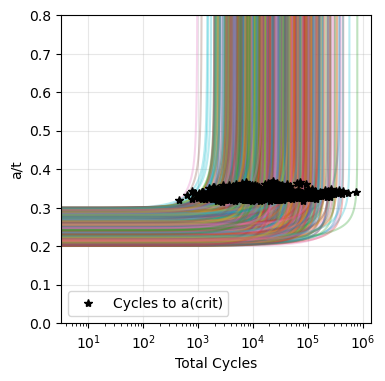

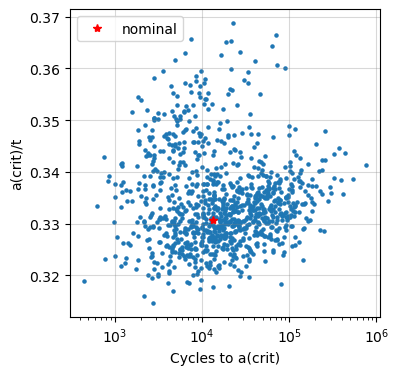

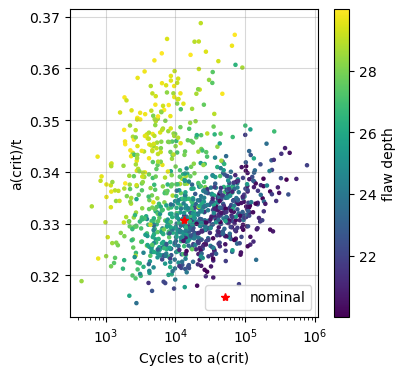

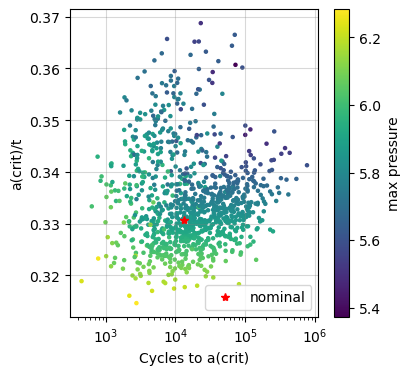

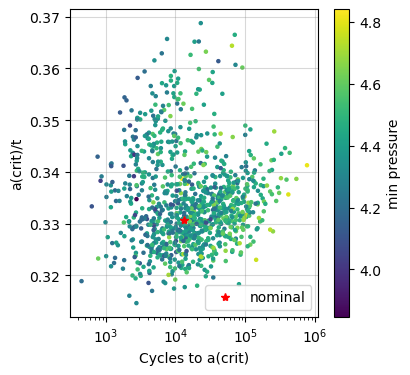

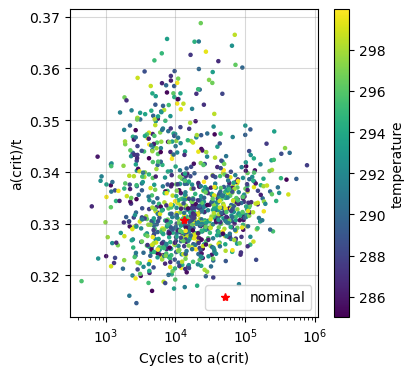

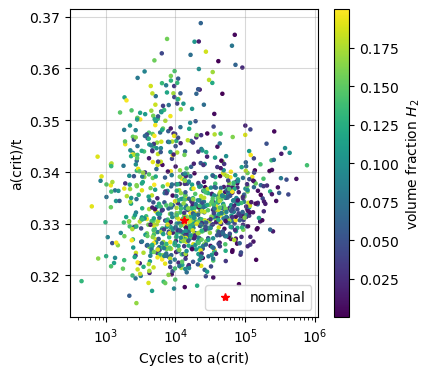

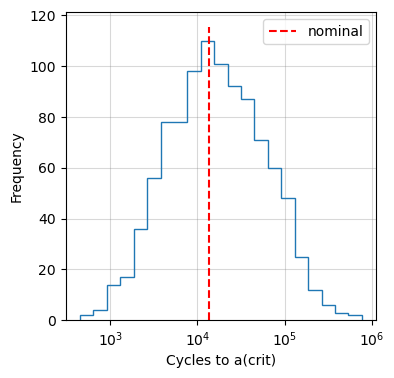

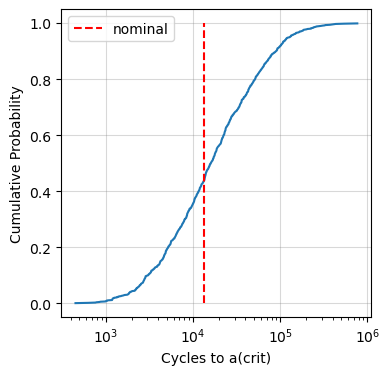

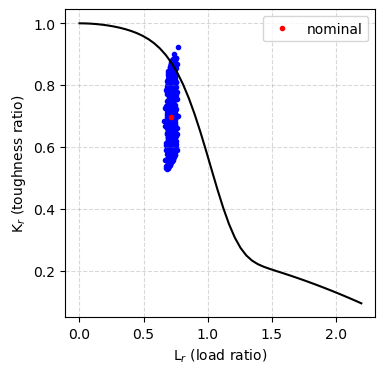

In [49]:
analysis.generate_probabilistic_results_plots(plotted_variable=plotted_variable)
analysis.assemble_failure_assessment_diagram()

In [50]:
analysis.save_results()

'Results/date_31_10_2023_time_16_27/'